# **Section 4. Practical concerns**

## **L2 Regularization**


L2 regularization prevents weights to grow too large. We try to incorporate our prior belief, that the weights should be small. The regularized cost function is:
\begin{align}
J_{\text{L2}} = J + \lambda \| w \|_2^2 = J + \frac{\lambda}{2} w^T w.
\end{align}
The derivative is:
\begin{align}
\frac{\partial J_{\text{L2}}}{\partial w} = \frac{\partial J}{w} + \lambda w.
\end{align}

The basic functions (sigmoid, cross-entropy, gradient descent, test_train_split) added to utils.py.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/OnlineLearning/UdemyCourses/LogisticRegression/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/OnlineLearning/UdemyCourses/LogisticRegression


In [ ]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Logistic regression class with L2 regularization

class LogisticRegressionL2Regularization:
  def __init__(self,lamb=1.0,learning_rate=0.1,max_iter=1000):
    self.lamb = lamb

  def add_ones(self,X):
    if X.ndim == 1:
      X.shape = [1,X.shape[0]]
    return np.column_stack( (np.ones(X.shape[0]),X) )

  def fit(self,X,t):
    # Add a column of ones
    Xb = self.add_ones(X)
    # randomly initialize weights
    D = Xb.shape[1]
    self.w = np.random.randn(D) #/ np.sqrt(D)
    #self.w = np.array([0,4,4]) #
    # passing objective function and gradient as a lambda to gradient descent function
    J = lambda w : cross_entropy(t, sigmoid(Xb @ w) ) + 0.5 * self.lamb * (w.T @ w)
    gradient = lambda w : Xb.T @ (sigmoid(Xb @ w) - t) + self.lamb * w
    self.w, self.cost = gradient_descent(self.w,J,gradient,learning_rate=0.1,max_iter=1000)
    
  def forward(self,X):
    # Add a column of ones
    Xb = self.add_ones(X)
    return np.round(sigmoid(Xb @ self.w))

  # Just to have the usual predict method as well
  def predict(self,X):
    return self.forward(X)

  def score(self,X,t):
    return np.mean( t == self.predict(X) )


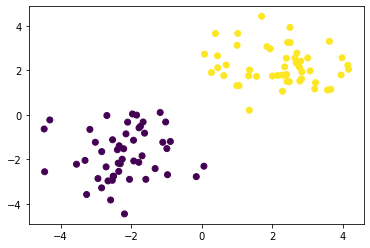

In [ ]:
# Generating data

N = 100
D = 2

X = np.random.randn(N,D)

X[:50,:] = X[:50,:] - 2* np.ones((50,D))
X[50:,:] = X[50:,:] + 2* np.ones((50,D))
T = np.array([0]*50 + [1]*50)

plt.scatter(X[:,0],X[:,1],c=T)

[-0.34806186  2.48105891  1.9585217 ]


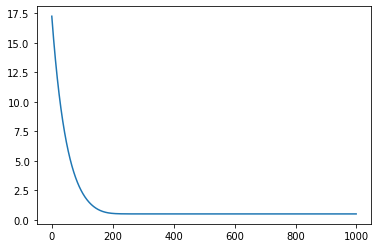

In [ ]:
model_L2 = LogisticRegressionL2Regularization(lamb=0.1)
model_L2.fit(X,T)

print(model_L2.w)

plt.plot(model_L2.cost);

## **L1 Regularization**

L1 regularization suppresses the weights of unimportant features, in order to prevent overfitting. The regularized cost function is:
\begin{align}
J_{\text{L1}} = J + \lambda \| w \|_1 = J + \lambda \sum_i |w_i|.
\end{align}
The derivative is:
\begin{align}
\frac{\partial J_{\text{L1}}}{\partial w} = \frac{\partial J}{w} + \lambda \cdot \mathrm{sign}(w).
\end{align}

In [ ]:
# Generate data with a fat matrix

N = 50
D = 50

X = (np.random.random((N,D)) - 0.5)*10

true_w = np.array([1, 0.5, -0.5] + [0]*(D-3))

T = np.round(sigmoid(X @ true_w + np.random.randn(N)*0.5))


In [ ]:
# Logistic regression class with L1 regularization

class LogisticRegressionL1Regularization:
  def __init__(self,lamb=1.0,learning_rate=0.001,max_iter=5000):
    self.lamb = lamb

  def add_ones(self,X):
    if X.ndim == 1:
      X.shape = [1,X.shape[0]]
    return np.column_stack( (np.ones(X.shape[0]),X) )

  def fit(self,X,t):
    # Add a column of ones
    Xb = X #self.add_ones(X)    ## REMARK: no bias term is used in this example!
    # randomly initialize weights
    D = Xb.shape[1]
    self.w = np.random.randn(D) / np.sqrt(D)
    #self.w = np.array([0,4,4]) #
    # passing objective function and gradient as a lambda to gradient descent function
    J = lambda w : cross_entropy(t, sigmoid(Xb @ w) ) + self.lamb * np.abs(w).mean()
    gradient = lambda w : Xb.T @ (sigmoid(Xb @ w) - t) + self.lamb * np.sign(w)
    self.w, self.cost = gradient_descent(self.w,J,gradient,learning_rate=0.001,max_iter=5000)
    
  def forward(self,X):
    # Add a column of ones
    Xb = X#self.add_ones(X)
    return np.round(sigmoid(Xb @ self.w))

  # Just to have the usual predict method as well
  def predict(self,X):
    return self.forward(X)

  def score(self,X,t):
    return np.mean( t == self.predict(X) )


1.0


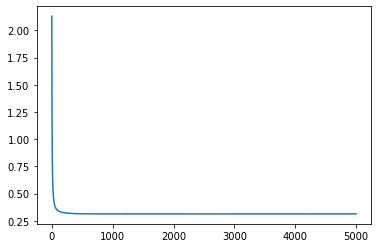

In [ ]:
model_L1 = LogisticRegressionL1Regularization(lamb=2.0)
model_L1.fit(X,T)
print(model_L1.score(X,T))

plt.plot(model_L1.cost)

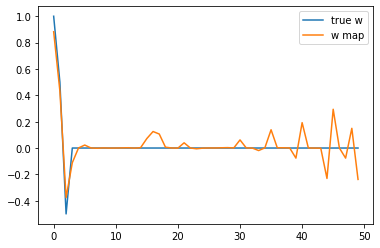

In [ ]:
plt.plot(true_w,label='true w')
plt.plot(model_L1.w,label='w map')
plt.legend()

## **The donut problem**

First, we generate the donut dataset:

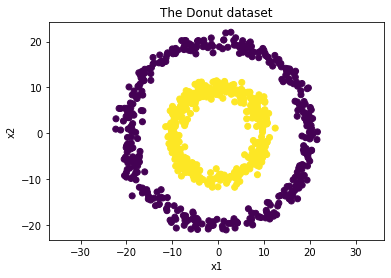

In [ ]:
N = 400

#Set mean radii for the two categories
R1 = 10.0
R2 = 20.0

#Set variance of radii for the two categories
std1 = 1.0
std2 = 1.0

x1 = []
x2 = []
y = []

# Sample radii for both categories
r1 = R1 + std1*np.random.randn(N)
r2 = R2 + std2*np.random.randn(N)

# Sample angles
theta1 = np.random.uniform(0,2*np.pi,N)
theta2 = np.random.uniform(0,2*np.pi,N)

# Going from polar coordinates to cartesian coordinates
x1.extend(r1*np.cos(theta1))
x2.extend(r1*np.sin(theta1))
y.extend(np.ones(N))
x1.extend(r2*np.cos(theta2))
x2.extend(r2*np.sin(theta2))
y.extend(np.zeros(N))

ax = plt.axes(xlabel='x1',ylabel='x2',title='The Donut dataset')
ax.axis('equal') # Setting axis scales equal, so the donut is really circular
plt.scatter(x1,x2,c=y);

In [ ]:
X = np.array([x1,x2]).T
T = np.array(y)

model = LogisticRegressionL2Regularization(lamb=0.0,learning_rate=0.0001,max_iter=5000)
model.fit(X,T)

/content/drive/MyDrive/OnlineLearning/UdemyCourses/LogisticRegression/utils.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/content/drive/MyDrive/OnlineLearning/UdemyCourses/LogisticRegression/utils.py:28: RuntimeWarning: divide by zero encountered in log
  return -( np.log(y[t == 1]).mean() + np.log(1-y[t == 0]).mean() )


/content/drive/MyDrive/OnlineLearning/UdemyCourses/LogisticRegression/utils.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


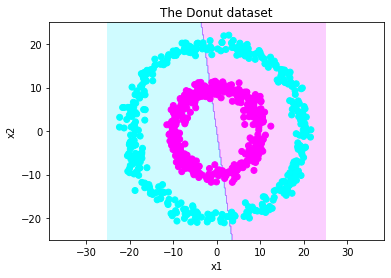

In [ ]:
x_plot = y_plot = np.linspace(-25, 25, 200)

z = np.array([model.predict(np.array([i,j])) for j in y_plot for i in x_plot])
Z = z.reshape(200,200)

mesh_x, mesh_y = np.meshgrid(x_plot, y_plot)

ax = plt.axes(xlabel='x1',ylabel='x2',title='The Donut dataset')
ax.axis('equal') # Setting axis scales equal, so the donut is really circular

plt.contourf(x_plot,y_plot,Z,alpha=0.2,cmap='cool')
plt.scatter(X[:,0],X[:,1],c=T,cmap='cool')

We cannot describe the data with just $x_1$ and $x_2$ as features, but we can, if we introduce a new feature $r = \sqrt{x_1^2 + x_2^2}$:

In [ ]:
X_new = np.column_stack((X,np.sqrt((X**2).sum(axis=1))))

model.fit(X_new,T)

/content/drive/MyDrive/OnlineLearning/UdemyCourses/LogisticRegression/utils.py:28: RuntimeWarning: divide by zero encountered in log
  return -( np.log(y[t == 1]).mean() + np.log(1-y[t == 0]).mean() )
/content/drive/MyDrive/OnlineLearning/UdemyCourses/LogisticRegression/utils.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


/content/drive/MyDrive/OnlineLearning/UdemyCourses/LogisticRegression/utils.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


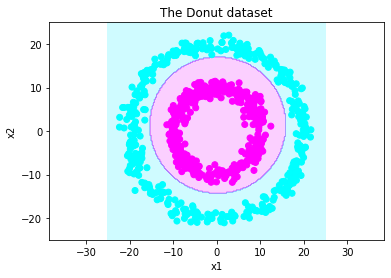

In [ ]:
x_plot = y_plot = np.linspace(-25, 25, 200)

z = np.array([model.predict(np.array([i,j,np.sqrt(i*i+j*j)])) for j in y_plot for i in x_plot])
Z = z.reshape(200,200)

mesh_x, mesh_y = np.meshgrid(x_plot, y_plot)

ax = plt.axes(xlabel='x1',ylabel='x2',title='The Donut dataset')
ax.axis('equal') # Setting axis scales equal, so the donut is really circular

plt.contourf(x_plot,y_plot,Z,alpha=0.2,cmap='cool')
plt.scatter(X[:,0],X[:,1],c=T,cmap='cool')

## **The XOR problem**

I used the generalized XOR dataset (instead of the simple XOR, which was used in the video):
\begin{align}
x_1 > 0 \,\,  \text{XOR} \,\, x_2 > 0 \\
\end{align}

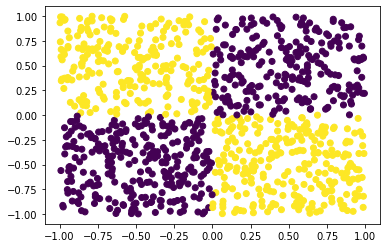

In [ ]:
# Generating the XOR dataset

N = 1000
X = (2*np.random.random((N,2)) - 1)
Y = np.zeros(N)
Y = (X[:,0] > 0) ^ (X[:,1] > 0)
plt.scatter(X[:,0],X[:,1],c=Y);

In [ ]:
model_XOR = LogisticRegressionL2Regularization(lamb=0.0,learning_rate=0.0001,max_iter=5000)
model_XOR.fit(X,Y)

/content/drive/MyDrive/OnlineLearning/UdemyCourses/LogisticRegression/utils.py:28: RuntimeWarning: divide by zero encountered in log
  return -( np.log(y[t == 1]).mean() + np.log(1-y[t == 0]).mean() )


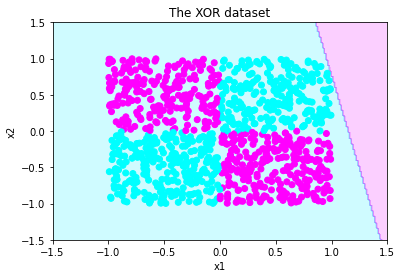

In [ ]:
x_plot = y_plot = np.linspace(-1.5, 1.5, 200)

z = np.array([model_XOR.predict(np.array([i,j])) for j in y_plot for i in x_plot])
Z = z.reshape(200,200)

mesh_x, mesh_y = np.meshgrid(x_plot, y_plot)

ax = plt.axes(xlabel='x1',ylabel='x2',title='The XOR dataset')

plt.contourf(x_plot,y_plot,Z,alpha=0.2,cmap='cool')
plt.scatter(X[:,0],X[:,1],c=Y,cmap='cool')

Trying to add new features: $|x_1|$ and $|x_2|$

In [ ]:
X_new = np.column_stack((X,X[:,0]*X[:,1]))

model_XOR.fit(X_new,Y)
model_XOR.w

array([ 4.53293209e-02, -2.15271931e-01, -5.02102144e-02, -1.31951907e+02])

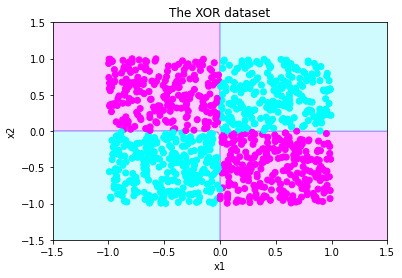

In [ ]:
x_plot = y_plot = np.linspace(-1.5, 1.5, 200)

z = np.array([model_XOR.predict(np.array([i,j,i*j])) for j in y_plot for i in x_plot])
Z = z.reshape(200,200)

mesh_x, mesh_y = np.meshgrid(x_plot, y_plot)

ax = plt.axes(xlabel='x1',ylabel='x2',title='The XOR dataset')

plt.contourf(x_plot,y_plot,Z,alpha=0.2,cmap='cool')
plt.scatter(X[:,0],X[:,1],c=Y,cmap='cool');